In [5]:
import os
import rospy
import numpy
import json
import pandas

from realsense2_camera.msg import EstimatedPose

In [6]:
SAVE_PATH = os.getcwd()

In [7]:
def pose_callback(data):
    '''ROS Callback function for the pose_estimation'''
    global pose
    pose = numpy.array([(-1)*data.tx, data.ty, data.tz, data.rx, data.ry, data.rz])

In [8]:
rospy.init_node("POSEEVAL", anonymous=True)
rospy.Subscriber("/pose_estimation", EstimatedPose, pose_callback)
rate = rospy.Rate(100)

In [9]:
Trans_xs = list()
Trans_ys = list()
Trans_zs = list()
Rot_xs = list()
Rot_ys = list()
Rot_zs = list()

In [10]:
for i in range(100*60):
    Trans_xs.append(pose[0])
    Trans_ys.append(pose[1])
    Trans_zs.append(pose[2])
    Rot_xs.append(pose[3])
    Rot_ys.append(pose[4])
    Rot_zs.append(pose[5])
    rate.sleep()

In [11]:
save_dict = {
    "Trans_x"  : Trans_xs,
    "Trans_y"  : Trans_zs,
    "Trans_z"  : Trans_ys,
    "Rot_x"  : Rot_xs,
    "Rot_y"  : Rot_ys,
    "Rot_z"  : Rot_zs,
}
filename = "POSE_EVALUATION_0.json"
with open(os.path.join(*[SAVE_PATH, filename]), 'w') as file:
    json.dump(save_dict, file)
    file.close()

In [12]:
import matplotlib.pyplot as plt

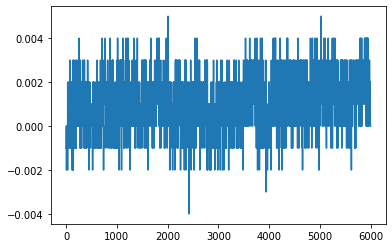

In [12]:
plt.plot(Mzs)

In [13]:
numpy.mean(Trans_xs)

-0.12676549129598935

In [14]:
numpy.std(Trans_xs)

6.136608921493548e-05

In [15]:
numpy.std(Trans_ys)

4.245391041679652e-06

In [16]:
numpy.std(Trans_zs)

6.880659909568332e-06

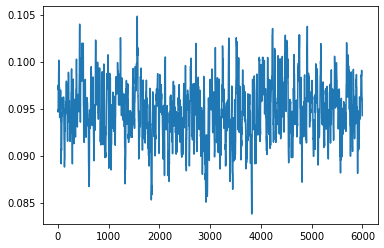

In [17]:
plt.plot(Rot_xs)

In [18]:
numpy.std(Rot_xs)

0.003099097094174414

In [19]:
numpy.std(Rot_ys)

0.0010454024286556966